In [3]:
import numpy as np
from gempy.bayesian.fields import compute_prob, calculate_ie_masked
import pyvista as pv
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.ndimage import map_coordinates
from skimage.transform import resize
import  matplotlib
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LinearSegmentedColormap
import sys
from tqdm import tqdm

# Load first half of blocks (to much data to do it in one run)

In [ ]:
#Each blocksx folder from the probabilistic sampling was divided into two, otherwise the notebook would crash.
blocks_list_1 = os.listdir('blocks0')

#load all blocks of each series into one array
blocks_0 = []
blocks_1 = []
blocks_2 = []
blocks_3 = []
blocks_4 = []
blocks_5 = []

voxels = 100*100*50
res =[100,100,50]

for block in tqdm(blocks_list_1):
    blocks_0 = np.append(blocks_0, np.load('blocks0' + block)[0, 0:voxels])
    blocks_1 = np.append(blocks_1, np.load('blocks1' + block)[0, 0:voxels])
    blocks_2 = np.append(blocks_2, np.load('blocks2' + block)[0, 0:voxels])
    blocks_3 = np.append(blocks_3, np.load('blocks3' + block)[0, 0:voxels])
    blocks_4 = np.append(blocks_4, np.load('blocks4' + block)[0, 0:voxels])
    blocks_5 = np.append(blocks_5, np.load('blocks5' + block)[0, 0:voxels])
    

# entropy of first half 

In [ ]:
def entropyy(iterations, resolution, block):
    '''returns max, min and mean entropy of one block'''
    f_block = block.reshape(iterations,-1)
    prob_block = compute_prob(f_block)
    entropy_block = calculate_ie_masked(prob_block).reshape(resolution)
    return(entropy_block)


In [ ]:
#Combined entropy of all fault blocks
n_iterations=500
entropy_block_f= entropyy(n_iterations, res, blocks_0) + entropyy(n_iterations, res, blocks_1)+ entropyy(n_iterations, res, blocks_2)+ entropyy(n_iterations, res, blocks_3)+ entropyy(n_iterations, res, blocks_4)

#Entropy of lithology
entropy_lith_block = entropyy(n_iterations, res, blocks_5)

np.save('entropy_block_f1_comp.npy', entropy_block_f)
np.save('entropy_block_f11.npy', entropyy(n_iterations, res, blocks_0))
np.save('entropy_block_f12.npy', entropyy(n_iterations, res, blocks_1))
np.save('entropy_block_f13.npy', entropyy(n_iterations, res, blocks_2))
np.save('entropy_block_f14.npy', entropyy(n_iterations, res, blocks_3))
np.save('entropy_block_f15.npy', entropyy(n_iterations, res, blocks_4))
np.save('entropy_lith_block1.npy', entropy_lith_block)

# loading and entropy of second half of the data

In [ ]:
blocks_list_1 = os.listdir('blocks00')

#load all blocks of each series into one array
blocks_00 = []
blocks_01 = []
blocks_02 = []
blocks_03 = []
blocks_04 = []
blocks_05 = []

voxels = 100*100*50
res =[100,100,50]

for block in tqdm(blocks_list_1):
    blocks_00 = np.append(blocks_00, np.load('blocks00' + block)[0, 0:voxels])
    blocks_01 = np.append(blocks_01, np.load('blocks01' + block)[0, 0:voxels])
    blocks_02 = np.append(blocks_02, np.load('blocks02' + block)[0, 0:voxels])
    blocks_03 = np.append(blocks_03, np.load('blocks03' + block)[0, 0:voxels])
    blocks_04 = np.append(blocks_04, np.load('blocks04' + block)[0, 0:voxels])
    blocks_05 = np.append(blocks_05, np.load('blocks05' + block)[0, 0:voxels])

In [ ]:
#Combined entropy of all fault blocks
n_iterations=500
entropy_block_f2= entropyy(n_iterations, res, blocks_00) + entropyy(n_iterations, res, blocks_01)+ entropyy(n_iterations, res, blocks_02)+ entropyy(n_iterations, res, blocks_03)+ entropyy(n_iterations, res, blocks_04)

#Entropy of lithology
entropy_lith_block2 = entropyy(n_iterations, res, blocks_05)

np.save('entropy_block_f2_comp.npy', entropy_block_f2)
np.save('entropy_block_f111.npy', entropyy(n_iterations, res, blocks_00))
np.save('entropy_block_f122.npy', entropyy(n_iterations, res, blocks_01))
np.save('entropy_block_f133.npy', entropyy(n_iterations, res, blocks_02))
np.save('entropy_block_f144.npy', entropyy(n_iterations, res, blocks_03))
np.save('entropy_block_f155.npy', entropyy(n_iterations, res, blocks_04))
np.save('entropy_lith_block2.npy', entropy_lith_block2)

# Loading all entropy arrays (start here when entropy blocks were already saved)

In [5]:
entropy_fault_blocks = (np.load('entropy_block_f1_comp.npy') + np.load('entropy_block_f2_comp.npy')) /2 
entropy_lith_blocks = np.load('entropy_lith_block1.npy') + np.load('entropy_lith_block2.npy') /2
#divided by 2, due to two entropy blocks

# Plotting

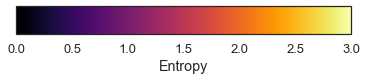

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = 'inferno'
norm = mpl.colors.Normalize(vmin=0, vmax=3)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Entropy')

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [23]:
extent = [491221.0, 412000.0, 5232840.0, 5179600.0, 1050.0, -6500.0]
extent_yz = [5234000.0, 5179800.0,  -6500.0,1502.0]

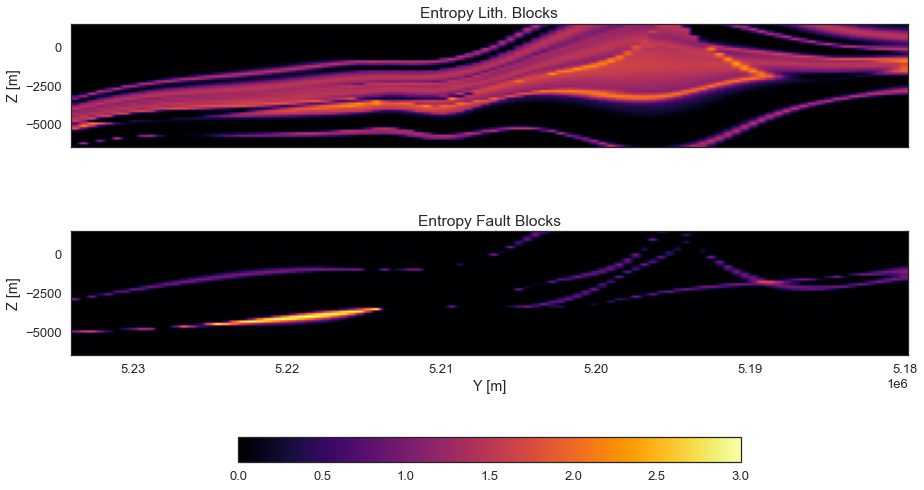

In [27]:
cell = 65 
fig, ax= plt.subplots(2,1,sharex = True,  figsize=(15,10))

im1 = ax[0].imshow(entropy_lith_blocks[cell,:,:].T, cmap = 'inferno', origin = 'lower',
              extent = extent_yz, vmax=3)
im2 = ax[1].imshow(entropy_fault_blocks[cell,:,:].T, cmap = 'inferno', origin = 'lower',
              extent = extent_yz, vmax=3)

ax[1].set_xlabel('Y [m]')
ax[0].set_ylabel('Z [m]')
ax[1].set_ylabel('Z [m]')

ax[0].set_title('Entropy Lith. Blocks')
ax[1].set_title('Entropy Fault Blocks')
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.2)

#ax[0].text(0.01,0.8, '$\mu=0.70$', fontsize = 14, verticalalignment = 'bottom', color = 'white', #
#             transform = ax[0].transAxes, bbox = props)
#ax[1].text(0.01,0.8,'$\mu=0.74$', fontsize = 14, verticalalignment = 'bottom', color = 'white', #, ''
#             transform = ax[1].transAxes, bbox = props)
fig.patch.set_facecolor('white')
fig.savefig('Entropy_Profile', transparent= False)
fig.colorbar(im1, ax = ax[:], shrink = 0.6, location = 'bottom')

In [10]:
entropy_lith_block_mapped = resize(entropy_lith_blocks,(800, 532.0, 75.0))
entropy_block_f_mapped = resize(entropy_fault_blocks,(800.0, 532.0, 75.0))

In [ ]:
#Credit to Alexander Jüstel
def plot_entropy_3d(array):
    sargs = dict(
        n_labels= 4,
        fmt="%.2f",
        color='black')
        
    p = pv.Plotter(notebook = False)
    p.camera_position =[(225.42616094676856, 399.12340631668496, 257.3912472495674), 
                        (-74.48617945870785, 148.24735445450216, -18.0350197347693), 
                        (-0.4070592293592159, -0.409653310787582, 0.8163865192139408)]
    x = np.arange(0, array.shape[1], 1)
    y = np.arange(0, array.shape[0], 1)
    z = np.arange(0, array.shape[2], 1)
    x, y, z = np.meshgrid(-x, y, z)


    grid = pv.StructuredGrid(x, y, z)
    grid["Entropy"] = array.ravel(order="F")
    p.add_mesh(grid, scalars=grid["Entropy"], cmap='inferno', show_scalar_bar = True, scalar_bar_args=sargs, clim=[0,3], stitle='Information Entropy')
    p.set_background('white')
    p.show_grid(color='black')
    p.show()

In [30]:
plot_entropy_3d(entropy_lith_block_mapped)

In [31]:
plot_entropy_3d(entropy_block_f_mapped)

In [10]:
print(entropy_fault_blocks.max(), entropy_fault_blocks.min(), entropy_fault_blocks.mean())

2.997760042293107 0.0 0.08389862895215874


In [11]:
print(entropy_lith_blocks.max(), entropy_lith_blocks.mean(), entropy_lith_blocks.min())

2.5858167794906874 0.5484007504197018 0.0
